In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel("DadRegLis2.xlsx", sheet_name="exer16")
df.head()

,tipo,cultura,vitam_c
0,verde,organ,201.3
1,verde,organ,178.5
2,verde,organ,195.7
3,verde,organ,188.3
4,verde,convenc,134.3


In [2]:
df.columns

Index(['tipo', 'cultura', 'vitam_c'], dtype='object')

In [3]:
df.describe()

,vitam_c
count,28.000000
mean,232.392857
std,75.336135
min,130.200000
25%,170.625000
50%,214.900000
75%,316.800000
max,349.300000


In [4]:
descriptive_stats = df.groupby('tipo')['vitam_c'].describe()

print(descriptive_stats)

          count        mean        std    min    25%     50%      75%    max
tipo                                                                        
amarelo    10.0  323.440000  13.744672  299.0  316.8  325.45  327.875  349.3
verde       9.0  162.355556  28.675691  130.2  134.3  151.00  188.300  201.3
vermelho    9.0  201.266667  33.908701  156.3  173.3  211.70  228.500  243.3


In [5]:
descriptive_stats = df.groupby('cultura')['vitam_c'].describe()

print(descriptive_stats)

         count        mean        std    min     25%     50%     75%    max
cultura                                                                    
convenc   14.0  215.450000  89.686658  130.2  149.95  167.95  324.45  349.3
organ     14.0  249.335714  55.907652  178.5  203.90  234.00  307.85  335.3


In [6]:
df_encoded = pd.get_dummies(df, columns=['tipo', 'cultura'])
df_encoded=df_encoded.astype(float)
df_encoded.head()

,vitam_c,tipo_amarelo,tipo_verde,tipo_vermelho,cultura_convenc,cultura_organ
0,201.3,0.0,1.0,0.0,0.0,1.0
1,178.5,0.0,1.0,0.0,0.0,1.0
2,195.7,0.0,1.0,0.0,0.0,1.0
3,188.3,0.0,1.0,0.0,0.0,1.0
4,134.3,0.0,1.0,0.0,1.0,0.0


In [10]:
df['Tipo_Cultura'] = df['tipo'] + '_' + df['cultura']
df_encoded_interactions= pd.get_dummies(df, columns=['Tipo_Cultura']).drop(columns=['tipo', 'cultura'])
df_encoded_interactions=df_encoded_interactions.astype(float)
df_encoded_interactions.head()

,vitam_c,Tipo_Cultura_amarelo_convenc,Tipo_Cultura_amarelo_organ,Tipo_Cultura_verde_convenc,Tipo_Cultura_verde_organ,Tipo_Cultura_vermelho_convenc,Tipo_Cultura_vermelho_organ
0,201.3,0.0,0.0,0.0,1.0,0.0,0.0
1,178.5,0.0,0.0,0.0,1.0,0.0,0.0
2,195.7,0.0,0.0,0.0,1.0,0.0,0.0
3,188.3,0.0,0.0,0.0,1.0,0.0,0.0
4,134.3,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
import statsmodels.api as sm

y = df_encoded['vitam_c']  
X = df_encoded.drop(columns=['vitam_c','tipo_amarelo','cultura_convenc'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                vitam_c   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     107.1
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           4.95e-14
Time:                        07:50:31   Log-Likelihood:                -122.91
No. Observations:                  28   AIC:                             253.8
Df Residuals:                      24   BIC:                             259.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           307.7624      7.768     39.617

In [11]:
y = df_encoded_interactions['vitam_c']  
X = df_encoded_interactions.drop(columns=['vitam_c','Tipo_Cultura_amarelo_convenc'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                vitam_c   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     218.7
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.52e-18
Time:                        07:51:32   Log-Likelihood:                -105.27
No. Observations:                  28   AIC:                             222.5
Df Residuals:                      22   BIC:                             230.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Interactions model seem to be better

In [14]:
y = df_encoded_interactions['vitam_c']  
X = df_encoded_interactions.drop(columns=['vitam_c','Tipo_Cultura_verde_convenc'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                vitam_c   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     218.7
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.52e-18
Time:                        07:56:47   Log-Likelihood:                -105.27
No. Observations:                  28   AIC:                             222.5
Df Residuals:                      22   BIC:                             230.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [15]:
y = df_encoded_interactions['vitam_c']  
X = df_encoded_interactions.drop(columns=['vitam_c','Tipo_Cultura_vermelho_convenc'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                vitam_c   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     218.7
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.52e-18
Time:                        07:56:59   Log-Likelihood:                -105.27
No. Observations:                  28   AIC:                             222.5
Df Residuals:                      22   BIC:                             230.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## b)

In [12]:
from statsmodels.stats.multitest import multipletests

# Get the p-values for the t-tests on each coefficient
p_values = model.pvalues

# Display individual t-test results without adjustment
print("Individual t-test p-values for each coefficient (without adjustment):")
print(p_values)

# Apply Bonferroni correction to control the family-wise error rate
alpha = 0.01  # Global significance level
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')

print("\nAdjusted p-values after Bonferroni correction:")
print(pvals_corrected)

# Conclusion for each test
for i, (rej, pval) in enumerate(zip(reject, pvals_corrected)):
    variable_name = p_values.index[i]
    print(f"Test for {variable_name}: {'Reject H0' if rej else 'Fail to reject H0'}, p-value (adjusted) = {pval:.4f}")

Individual t-test p-values for each coefficient (without adjustment):
const                            2.493703e-26
Tipo_Cultura_amarelo_organ       1.043311e-01
Tipo_Cultura_verde_convenc       6.881175e-18
Tipo_Cultura_verde_organ         1.788273e-14
Tipo_Cultura_vermelho_convenc    7.024312e-16
Tipo_Cultura_vermelho_organ      3.036537e-12
dtype: float64

Adjusted p-values after Bonferroni correction:
[1.49622177e-25 6.25986424e-01 4.12870511e-17 1.07296395e-13
 4.21458727e-15 1.82192207e-11]
Test for const: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_amarelo_organ: Fail to reject H0, p-value (adjusted) = 0.6260
Test for Tipo_Cultura_verde_convenc: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_verde_organ: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_vermelho_convenc: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_vermelho_organ: Reject H0, p-value (adjusted) = 0.0000


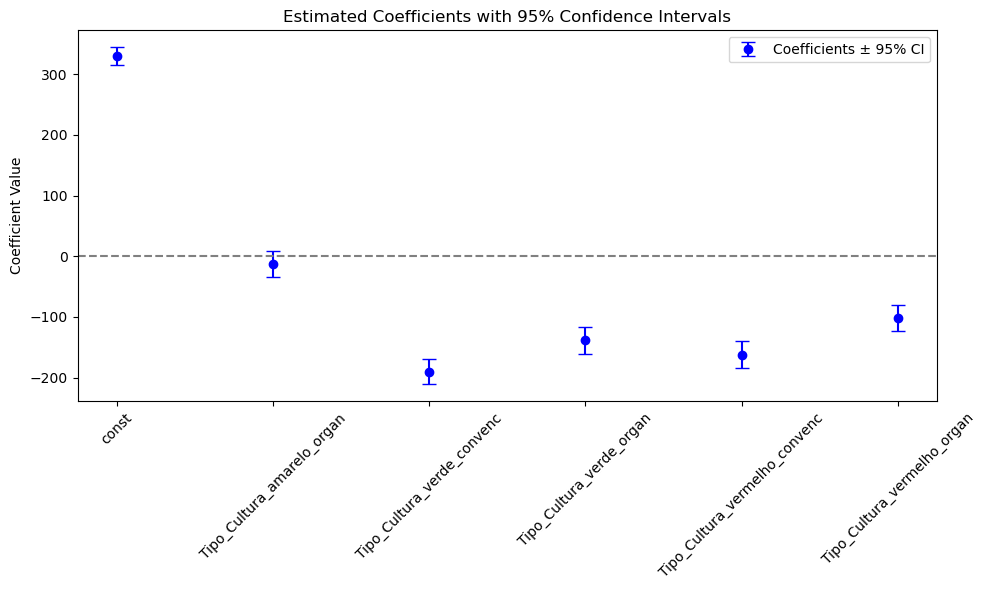

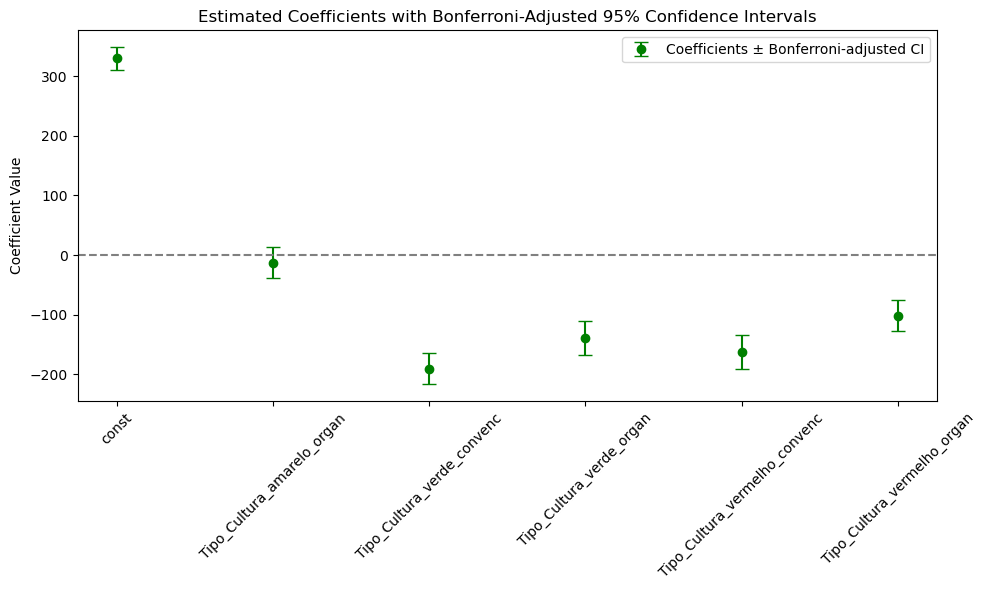

In [13]:
import matplotlib.pyplot as plt

# Visualizing the coefficients with confidence intervals
conf_intervals = model.conf_int(alpha=alpha)
coefficients = model.params

plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals.index, coefficients, 
             yerr=[coefficients - conf_intervals[0], conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='blue', label='Coefficients ± 95% CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()


# Applying Bonferroni adjustment to the confidence intervals
# Calculate the Bonferroni-adjusted alpha level
adjusted_alpha = alpha / len(coefficients)  # Bonferroni adjustment divides alpha by the number of tests

# Calculate the Bonferroni-adjusted confidence intervals
bonferroni_conf_intervals = model.conf_int(alpha=adjusted_alpha)

# Visualizing the coefficients with Bonferroni-adjusted confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(bonferroni_conf_intervals.index, coefficients, 
             yerr=[coefficients - bonferroni_conf_intervals[0], bonferroni_conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='green', label='Coefficients ± Bonferroni-adjusted CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with Bonferroni-Adjusted 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()

Based on the results, the best way to cultivate bell peppers is to have the highest average vitamin C is by cultivating yellow bell peppers in a convencional manner. With the colour of the bell pepper being the most important predicter of increase/decrease in average vitamin c, followed by the cultivation manner (though this not being important for yellow bell peppers)

## c)

Individual t-test p-values for each coefficient (without adjustment):
const                            3.177329e-18
Tipo_Cultura_amarelo_convenc     6.881175e-18
Tipo_Cultura_amarelo_organ       2.941981e-17
Tipo_Cultura_verde_organ         1.389037e-06
Tipo_Cultura_vermelho_convenc    1.698228e-03
Tipo_Cultura_vermelho_organ      4.169292e-11
dtype: float64

Adjusted p-values after Bonferroni correction:
[1.90639737e-17 4.12870511e-17 1.76518844e-16 8.33422236e-06
 1.01893697e-02 2.50157502e-10]
Test for const: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_amarelo_convenc: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_amarelo_organ: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_verde_organ: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Cultura_vermelho_convenc: Fail to reject H0, p-value (adjusted) = 0.0102
Test for Tipo_Cultura_vermelho_organ: Reject H0, p-value (adjusted) = 0.0000


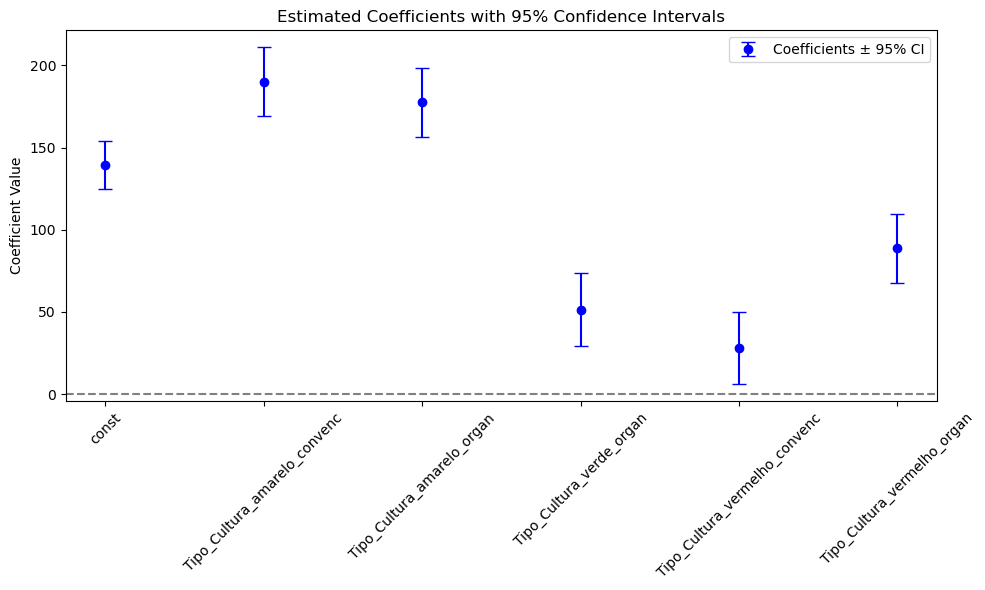

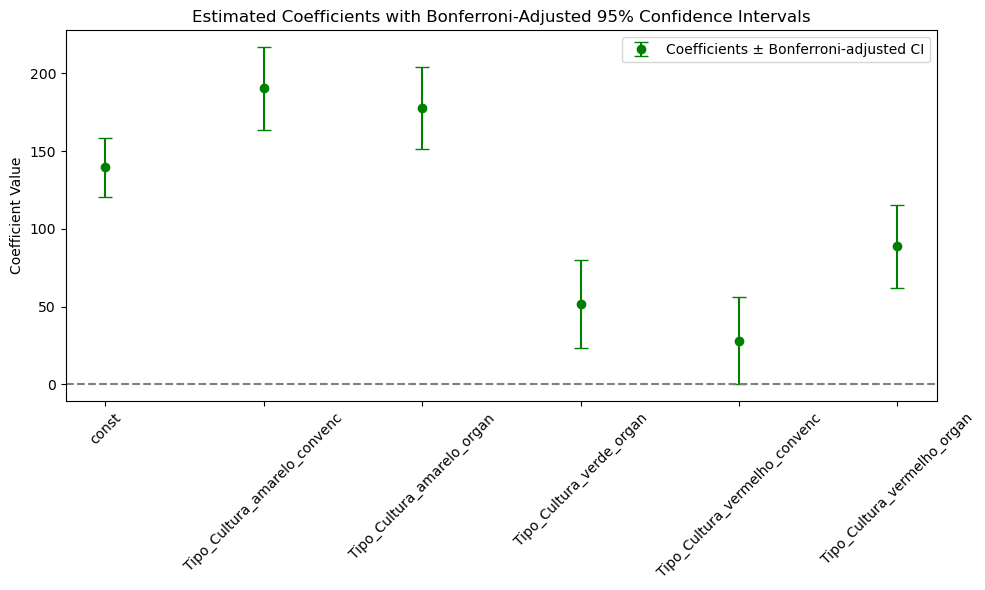

In [16]:
y = df_encoded_interactions['vitam_c']  
X = df_encoded_interactions.drop(columns=['vitam_c','Tipo_Cultura_verde_convenc'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

# Get the p-values for the t-tests on each coefficient
p_values = model.pvalues

# Display individual t-test results without adjustment
print("Individual t-test p-values for each coefficient (without adjustment):")
print(p_values)

# Apply Bonferroni correction to control the family-wise error rate
alpha = 0.01  # Global significance level
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')

print("\nAdjusted p-values after Bonferroni correction:")
print(pvals_corrected)

# Conclusion for each test
for i, (rej, pval) in enumerate(zip(reject, pvals_corrected)):
    variable_name = p_values.index[i]
    print(f"Test for {variable_name}: {'Reject H0' if rej else 'Fail to reject H0'}, p-value (adjusted) = {pval:.4f}")

# Visualizing the coefficients with confidence intervals
conf_intervals = model.conf_int(alpha=alpha)
coefficients = model.params

plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals.index, coefficients, 
             yerr=[coefficients - conf_intervals[0], conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='blue', label='Coefficients ± 95% CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()


# Applying Bonferroni adjustment to the confidence intervals
# Calculate the Bonferroni-adjusted alpha level
adjusted_alpha = alpha / len(coefficients)  # Bonferroni adjustment divides alpha by the number of tests

# Calculate the Bonferroni-adjusted confidence intervals
bonferroni_conf_intervals = model.conf_int(alpha=adjusted_alpha)

# Visualizing the coefficients with Bonferroni-adjusted confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(bonferroni_conf_intervals.index, coefficients, 
             yerr=[coefficients - bonferroni_conf_intervals[0], bonferroni_conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='green', label='Coefficients ± Bonferroni-adjusted CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with Bonferroni-Adjusted 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
from scipy.stats import norm, t
num_coeffs = len(model.params)

# Desired global confidence level
global_confidence_level = 0.95

# Calculate the individual confidence level using Bonferroni correction
alpha = 1 - global_confidence_level
individual_alpha = alpha / num_coeffs
individual_conf_level = 1 - individual_alpha

# Degrees of freedom for the t-distribution
df_residual = model.df_resid

# Calculate the critical t-value for the adjusted confidence level
t_critical = t.ppf(1 - individual_alpha / 2, df=df_residual)

# Extract the coefficients and standard errors
coefficients = model.params[1:len(model.params)+1]  
standard_errors = model.bse[1:len(model.params)+1]  

# Construct the Bonferroni-adjusted confidence intervals
conf_intervals = []
for i in range(len(coefficients)):
    lower_bound = coefficients[i] - t_critical * standard_errors[i]
    upper_bound = coefficients[i] + t_critical * standard_errors[i]
    conf_intervals.append((lower_bound, upper_bound))

# Display the results
for j in range(1, len(model.params)):
    print(f"Bonferroni-adjusted confidence interval for β{j}: ({conf_intervals[j-1][0]:.4f}, {conf_intervals[j-1][1]:.4f})")

Bonferroni-adjusted confidence interval for β1: (168.7521, 211.7279)
Bonferroni-adjusted confidence interval for β2: (156.1921, 199.1679)
Bonferroni-adjusted confidence interval for β3: (28.6787, 74.2613)
Bonferroni-adjusted confidence interval for β4: (5.3037, 50.8863)
Bonferroni-adjusted confidence interval for β5: (67.2521, 110.2279)


By going from the convencional way of cultivating green bell peppers to the organic way, one can expect an increase on the average vitamin C around the interval of (28.6787, 74.2613) with 95% confidence

## d)

Correlation matrix of estimated betas:
                                  const  Tipo_Cultura_amarelo_convenc  \
const                          1.000000                     -0.707107   
Tipo_Cultura_amarelo_convenc  -0.707107                      1.000000   
Tipo_Cultura_amarelo_organ    -0.707107                      0.500000   
Tipo_Cultura_verde_organ      -0.666667                      0.471405   
Tipo_Cultura_vermelho_convenc -0.666667                      0.471405   
Tipo_Cultura_vermelho_organ   -0.707107                      0.500000   

                               Tipo_Cultura_amarelo_organ  \
const                                           -0.707107   
Tipo_Cultura_amarelo_convenc                     0.500000   
Tipo_Cultura_amarelo_organ                       1.000000   
Tipo_Cultura_verde_organ                         0.471405   
Tipo_Cultura_vermelho_convenc                    0.471405   
Tipo_Cultura_vermelho_organ                      0.500000   

                     

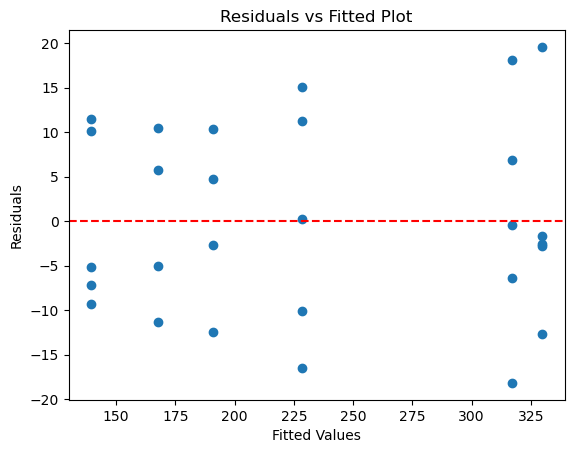

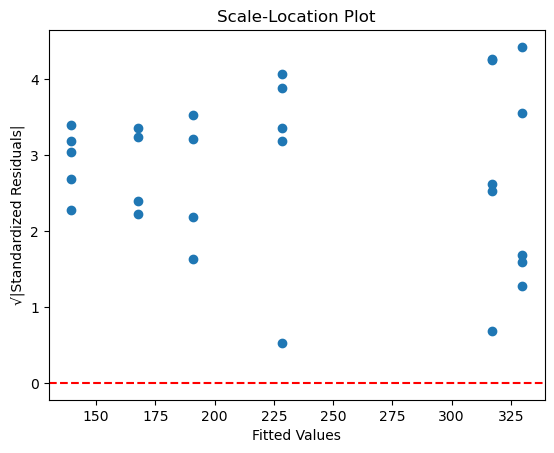

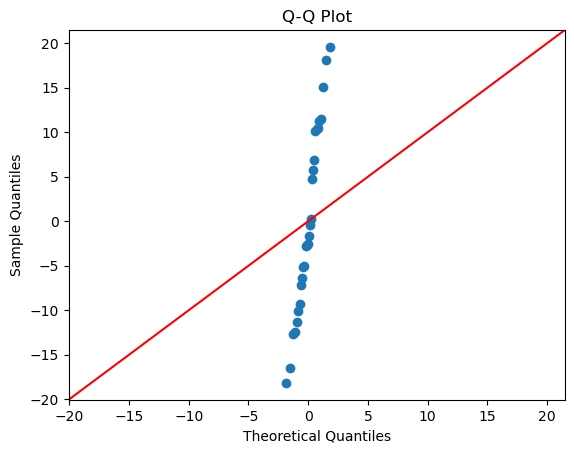

Shapiro-Wilk test statistic: 0.9646, p-value: 0.4444
Fail to reject the null hypothesis: Residuals appear to be normally distributed.
Anderson-Darling test statistic: 0.3536
Critical values and significance levels:
Significance level: 15.0%, Critical value: 0.518
Fail to reject the null hypothesis at the 15.0% significance level.
Significance level: 10.0%, Critical value: 0.59
Fail to reject the null hypothesis at the 10.0% significance level.
Significance level: 5.0%, Critical value: 0.708
Fail to reject the null hypothesis at the 5.0% significance level.
Significance level: 2.5%, Critical value: 0.826
Fail to reject the null hypothesis at the 2.5% significance level.
Significance level: 1.0%, Critical value: 0.983
Fail to reject the null hypothesis at the 1.0% significance level.
Jarque-Bera test statistic: 1.3012, p-value: 0.5217
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


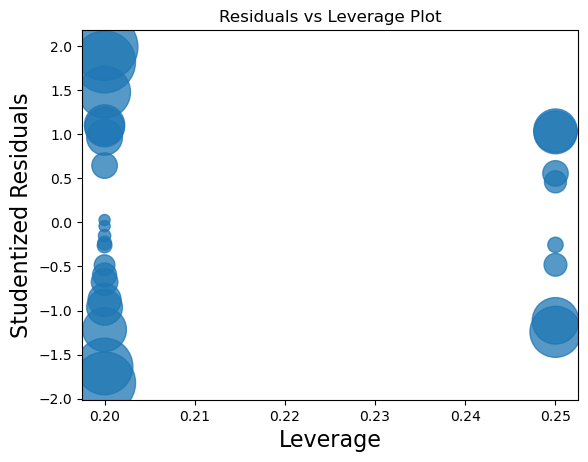

                         Feature       VIF
0                          const  5.600000
1   Tipo_Cultura_amarelo_convenc  1.642857
2     Tipo_Cultura_amarelo_organ  1.642857
3       Tipo_Cultura_verde_organ  1.542857
4  Tipo_Cultura_vermelho_convenc  1.542857
5    Tipo_Cultura_vermelho_organ  1.642857


c:\Users\hugog\Desktop\Mestrado - Matérias\Regression Models\Linear_Regression_Diagnostics.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


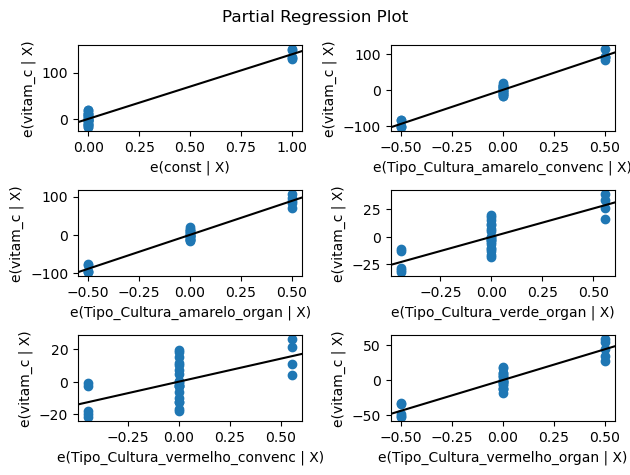

Breusch-Pagan test p-value: 0.7723
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.
White test p-value: 0.7723
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.


In [19]:
from Linear_Regression_Diagnostics import model_diagnostics

model_diagnostics(model, X, y)

The diagnostics seem to indicate that the model is good